In [49]:
import os
import glob
import pandas as pd
from PIL import Image
import numpy as np

                                          image_path  \
0  lbmaske\AHD-0425-PA-0007561_JITENDRA TRIVEDI D...   
1  lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...   
2  lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...   
3  lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...   
4  lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...   

                                          image_data  
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
1  [[[248, 248, 248], [248, 248, 248], [248, 248,...  
2  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
4  [[[255, 255, 255], [255, 255, 255], [255, 255,...  


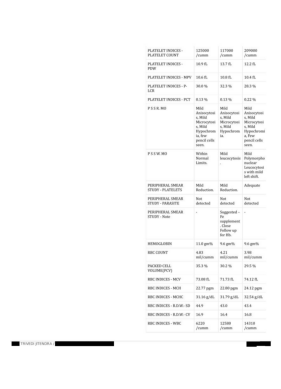

In [50]:
image_dir = "lbmaske"

image_paths = glob.glob(os.path.join(image_dir, "*.png"))

images = [np.array(Image.open(img_path)) for img_path in image_paths]

df = pd.DataFrame({
    "image_path": image_paths,
    "image_data": images
})

print(df.head())

import matplotlib.pyplot as plt

plt.imshow(df.loc[0, "image_data"])
plt.axis('off')
plt.show()


**Problem Statement:**

Develop a scalable and accurate solution to process lab reports with the objective of extracting all lab test
names, their corresponding values, and reference ranges. Use the provided dataset of lab report images to
build logic/model.

The logic must be implemented in Python and deployed as a Fast API service. The API should expose a
POST endpoint /get-lab-tests that accepts an image file as input and returns the extracted lab test data in a
structured JSON format.
Dataset link: https://drive.google.com/file/d/1LzG7oJ-cqGHK9KbwXnWfkWgnQ3xi8Cr9/view?usp=sharing

**Output format:**

*lab_test_out_of_range must be calculated after obtaining the bio_reference_range, it’s a Boolean value describing if
the test lies outside the normal range.
*is_success (Boolean flag) - Returns True if the API call is executed successfully.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  426 non-null    object
 1   image_data  426 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


In [52]:
df.shape

(426, 2)

In [53]:
print(df.image_data)

0      [[[255, 255, 255], [255, 255, 255], [255, 255,...
1      [[[248, 248, 248], [248, 248, 248], [248, 248,...
2      [[[255, 255, 255], [255, 255, 255], [255, 255,...
3      [[[255, 255, 255], [255, 255, 255], [255, 255,...
4      [[[255, 255, 255], [255, 255, 255], [255, 255,...
                             ...                        
421    [[[255, 255, 255], [255, 255, 255], [255, 255,...
422    [[[255, 255, 255], [255, 255, 255], [255, 255,...
423    [[[255, 255, 255], [255, 255, 255], [255, 255,...
424    [[[255, 255, 255], [255, 255, 255], [255, 255,...
425    [[[255, 255, 255], [255, 255, 255], [255, 255,...
Name: image_data, Length: 426, dtype: object


In [54]:
print(df.image_path)

0      lbmaske\AHD-0425-PA-0007561_JITENDRA TRIVEDI D...
1      lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...
2      lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...
3      lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...
4      lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...
                             ...                        
421    lbmaske\PUN-0425-PA-0011414_Lab Report_27-04-2...
422    lbmaske\PUN-0425-PA-0011414_Lab Report_27-04-2...
423    lbmaske\PUN-0425-PA-0011414_Lab Report_27-04-2...
424    lbmaske\PUN-0425-PA-0011414_Lab Report_27-04-2...
425    lbmaske\RJT-0425-PA-0003571_H_24489_9286123311...
Name: image_path, Length: 426, dtype: object


In [55]:
df.describe

<bound method NDFrame.describe of                                             image_path  \
0    lbmaske\AHD-0425-PA-0007561_JITENDRA TRIVEDI D...   
1    lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...   
2    lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...   
3    lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...   
4    lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...   
..                                                 ...   
421  lbmaske\PUN-0425-PA-0011414_Lab Report_27-04-2...   
422  lbmaske\PUN-0425-PA-0011414_Lab Report_27-04-2...   
423  lbmaske\PUN-0425-PA-0011414_Lab Report_27-04-2...   
424  lbmaske\PUN-0425-PA-0011414_Lab Report_27-04-2...   
425  lbmaske\RJT-0425-PA-0003571_H_24489_9286123311...   

                                            image_data  
0    [[[255, 255, 255], [255, 255, 255], [255, 255,...  
1    [[[248, 248, 248], [248, 248, 248], [248, 248,...  
2    [[[255, 255, 255], [255, 255, 255], [255, 255,...  
3    [[[255, 255, 255], [255, 255, 255], 

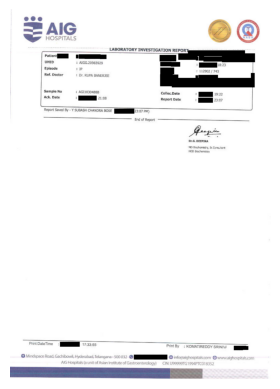

In [56]:
plt.imshow(df.loc[9, 'image_data'])
plt.axis('off')
plt.show()

In [57]:
df['image_size'] = df['image_data'].apply(lambda x: x.shape)
df['image_mode'] = df['image_path'].apply(lambda x:Image.open(x).mode)
print(df[['image_path', 'image_size', 'image_mode']].head())

                                          image_path       image_size  \
0  lbmaske\AHD-0425-PA-0007561_JITENDRA TRIVEDI D...  (2339, 1653, 3)   
1  lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...  (2339, 1653, 3)   
2  lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...  (2339, 1653, 3)   
3  lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...  (2339, 1654, 3)   
4  lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...  (2339, 1654, 3)   

  image_mode  
0        RGB  
1        RGB  
2        RGB  
3        RGB  
4        RGB  


In [58]:
df.drop(columns=['image_data', 'grayscale_image'], errors='ignore').to_json('image_data.json', index=False)


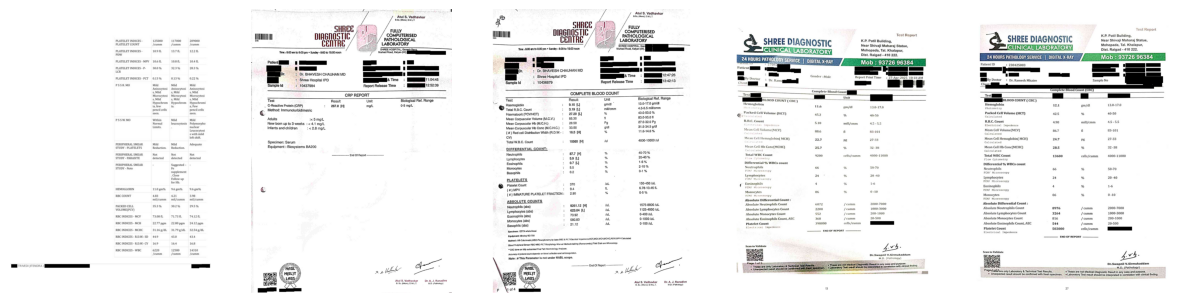

In [59]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(df.loc[i, 'image_data'])
    ax.axis('off')
plt.show()

In [60]:
ds = pd.read_csv('image_data.csv')
ds.head()

,image_path,image_size,image_mode
0,lbmaske\AHD-0425-PA-0007561_JITENDRA TRIVEDI D...,"(2339, 1653, 3)",RGB
1,lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...,"(2339, 1653, 3)",RGB
2,lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...,"(2339, 1653, 3)",RGB
3,lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...,"(2339, 1654, 3)",RGB
4,lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...,"(2339, 1654, 3)",RGB


In [61]:
ds.iloc[0:9]

,image_path,image_size,image_mode
0,lbmaske\AHD-0425-PA-0007561_JITENDRA TRIVEDI D...,"(2339, 1653, 3)",RGB
1,lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...,"(2339, 1653, 3)",RGB
2,lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2...,"(2339, 1653, 3)",RGB
3,lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...,"(2339, 1654, 3)",RGB
4,lbmaske\AHD-0425-PA-0008061_E-mahendrasinghdis...,"(2339, 1654, 3)",RGB
5,lbmaske\BLR-0425-PA-0036693_ARVIND REDDY REPAL...,"(2337, 1650, 3)",RGB
6,lbmaske\BLR-0425-PA-0037318_SASHANK P K 003731...,"(2337, 1650, 3)",RGB
7,lbmaske\BLR-0425-PA-0037318_SASHANK P K 003731...,"(2337, 1650, 3)",RGB
8,lbmaske\BLR-0425-PA-0037318_SASHANK P K 003731...,"(2337, 1650, 3)",RGB


In [62]:
output = pd.DataFrame(
    {
    'test_range':[],
    'test_value':[],
    'bio_reference_range': [],
    'test_unit': [],
    'lab_test_out_of_range': [],
    }
)

In [63]:
output

,test_range,test_value,bio_reference_range,test_unit,lab_test_out_of_range


TypeError: only integer scalar arrays can be converted to a scalar index

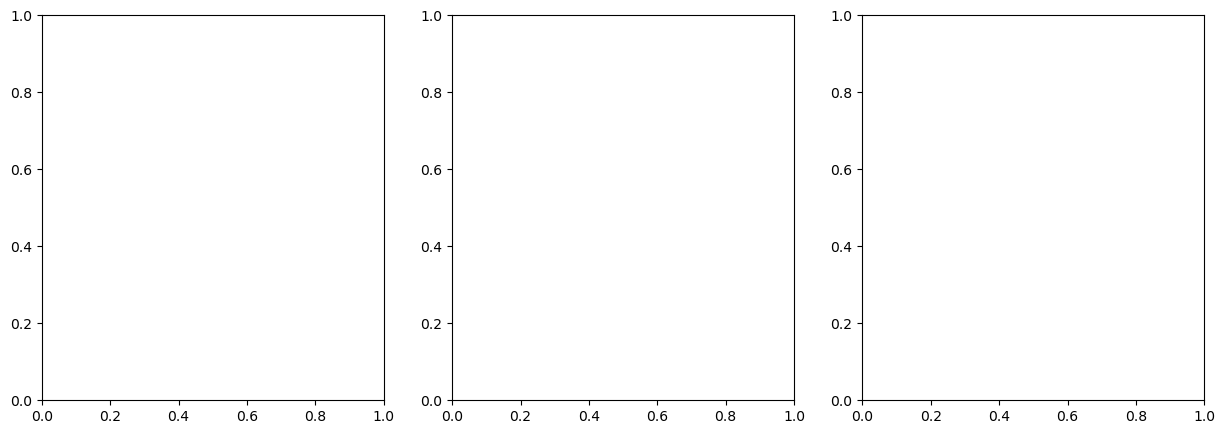

In [64]:
plt.subplots(1, 3, figsize=(15, 5))
for i in enumerate(0, df['image_data'].loc[9]):
    plt.imshow('image_data')
    plt.axis('off')
    plt.show()